# Исследование стартапов

- Автор: Вермишян Валерий
- Дата: 15.05.2025

# Цели и задачи проекта

**Цель** - подготовить датасет с историческими данными инвестиционного рынка стартапов; проверить, что данные в нём соответствуют здравому смыслу; ответить на вопросы заказчика о предобработке и о значении данных для бизнеса.

**Задачи**:
- Изучить датасеты
- Провести предобработку данных
- Провести ИАД и сформулировать выводы для заказчика

# Описание данных

Таблица `acquisition`. Содержит информацию о покупках одними компаниями других компаний:
- `id` — идентификатор покупки.
- `acquiring_company_id` — идентификатор покупающей компании.
- `acquired_company_id` — идентификатор покупаемой компании.
- `term_code` — варианты расчёта.
- `price_amount` — сумма сделки.
- `acquired_at` — дата сделки.

Таблица `company_and_rounds`. Содержит информацию о компаниях и раундах финансирования:
- `company ID` — идентификатор компании.
- `name` — название компании.
- `category code` — категория области деятельности компании.
- `status` — статус компании.
- `founded at` — дата инвестирования.
- `closed at` — дата закрытия компании.
- `domain` — официальный сайт компании.
- `network username` — ник компании в сети.
- `country code` — код страны компании.
- `investment rounds` — число инвестиционных раундов.
- `funding rounds` — число раундов финансирования.
- `funding total` — сумма финансирования.
- `milestones` — вехи финансирования.
- `funding round id` — идентификатор этапа финансирования.
- `company id` — идентификатор компании.
- `funded at` — дата финансирования.
- `funding round type` — тип финансирования.
- `raised amount` — сумма финансирования.
- `pre money valuation` — предварительная денежная оценка.
- `participants` — число участников.
- `is first round` — является ли раунд первым.
- `is last round` — является раунд последним.

Таблица `education`. Содержит информацию об образовании сотрудника:
- `id` — идентификатор записи об образовании.
- `person_id` — идентификатор работника.
- `instituition` — название учебного заведения.
- `graduated_at` — дата получения образования.

Таблица `people`. Содержит информацию о сотрудниках:
- `id` — идентификатор сотрудника.
- `first_name` — имя сотрудника.
- `last_name` — фамилия сотрудника.
- `company_id` — идентификатор компании.
- `network_username` — ник в социальных сетях.

Таблица `degrees`. Содержит информацию о типе образования сотрудника:
- `id` — идентификатор записи.
- `object_id` — идентификатор сотрудника.
- `degree_type` — тип образования.
- `subject` — специальность.

# Содержимое проекта

1. Знакомство с данными: загрузка и первичная предобработка
2. Предобработка данных, предварительное исследование
3. Исследовательский анализ данных
4. Итоговый вывод и рекомендации

# 1. Знакомство с данными: загрузка и первичная предобработка

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install phik -U
from phik import phik_matrix

# Библиотека для использования регулярных выражений
import re

# Библиотека, чтобы убрать научную нотацию из графиков
from matplotlib.ticker import StrMethodFormatter

Загружаем таблицы

In [2]:
acquisition = pd.read_csv('acquisition.csv')
company_and_rounds = pd.read_csv('company_and_rounds.csv')
people = pd.read_csv('people.csv')
education = pd.read_csv('education.csv')
degrees = pd.read_csv('degrees.csv')

Изучение датасета `acquisition`

In [3]:
# Выведем информацию о датасете
display(acquisition.info())

# Выведем 5 первых строк
display(acquisition.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


None

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


Что можно сказать о датасете `acquisition`:
- Кол-во строк 9407, столбцов 6
- Названия столбцов корректные
- Значения соответствуют названиям
- Есть много пропусков в столбце `term_code`, который содержит вариант расчета. Этот столбец нам не понадобится для работы, поэтому ничего не будем делать с пропусками
- Есть немного пропусков в столбце `acquired_at`, который содержит дату сделки. Пропусков очень мало, поэтому они не повлияют на результаты анализа
- В столбце `acquired_at` тип данных нужно будет поменять на временной тип. В остальных столбцах типы корректные, разве что далее попробуем оптимизировать числовые типы данных

Изучение датасета `company_and_rounds`

In [4]:
# Выведем информацию о датасете
display(company_and_rounds.info())

# Выведем 10 первых строк
display(company_and_rounds.head(10))
# Выведем 10 первых строк столбцов, которые не поместились в первом выводе
display(company_and_rounds[['funding  rounds','funding  total']].head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217471 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

None

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaN,mywebbo.com,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10002.0,Synergie Media,advertising,operating,2007-06-27,NaN,synergie-media.com,NaN,MAR,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10003.0,Green Basti Ecosystems,cleantech,operating,2008-08-20,NaN,NaN,NaN,IND,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,100042.0,HostNine,NaN,operating,NaN,NaN,hostnine.com,Hostnine,NaN,0.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,funding rounds,funding total
0,3.0,39750000.0
1,3.0,39750000.0
2,3.0,39750000.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


Что можно сказать о датасете `company_and_rounds`:
- Кол-во строк 217774, столбцов 22
- Названия столбцов некорректные, имеют пробелы и большие буквые там, где это не обосновано. + У двух столбцов одинаковые названия `company_id`. Скорее всего это произошло из-за присоединения разных таблиц. Далее исправим названия. 
- Значения соответствуют названиям
- Есть много столбцов с пропусками, в том числе с большим кол-вом пропусков. Пока непонятно, что с этим делать, решим после изучения всех данных
- Есть много столбцов с некорректными типами данных, которые нужно будет преобразовать (например столбцы с вещественным типом в целочисленный, или столбцы с типом object во временной)

In [5]:
# Исправляем названия столбцов датасета company_and_rounds
for column in company_and_rounds.columns:
    # Добавляем условие, отделяющее от списка один из одинаковых столбцов company_id
    # для того, чтобы потом не было 2 идентичных названия в датафрейме
    if column != 'company  id':
        company_and_rounds = company_and_rounds.rename(columns={column: re.sub(r'\s+', '_', column).lower()})
    else:
        company_and_rounds = company_and_rounds.rename(columns={column: 'company_id_2'})
    print(column)

company  ID
name
category  code
status
founded  at
closed  at
domain
network  username
country  code
investment  rounds
funding  rounds
funding  total
milestones
funding  round  id
company  id
funded  at
funding  round  type
raised  amount
pre  money  valuation
participants
is  first  round
is  last  round


Изучение датасета `education`

In [6]:
# Выведем информацию о датасете
display(education.info())

# Выведем 10 первых строк
display(education.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


None

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN
5,6,1017,Northeastern University,1988-01-01
6,7,6176,Rochester Institute of Technology,2002-01-01
7,8,5412,University of Cambridge,2002-01-01
8,9,1243,University of Oregon,1997-01-01
9,10,6265,University of Pennsylvania,1989-01-01


Что можно сказать о датасете `education`:
- Кол-во строк 109610, столбцов 4
- Названия столбцов корректные
- Значения соответствуют названиям
- Есть немного пропусков в `instituition`, что может говорить об отсутствии образования у сотрудника.
- Есть много пропусков в `graduated_at`
- В `id` и `person_id` тип данных корректный, но все равно оптимизируем его далее.
- В `graduated_ad` тип данных преобразуем во временной

Изучение датасета `people`

In [7]:
# Выведем информацию о датасете
display(people.info())

# Выведем 10 первых строк
display(people.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226700 non-null  object 
 2   last_name         226705 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


None

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN
5,100002,Keith,Kurzendoerfer,NaN,NaN
6,100006,Courtney,Homer,81558.0,jobsbostontech
7,100009,Eddy,Badrina,NaN,NaN
8,100010,Michael,Dadashyan,NaN,fbroulette
9,100011,Jeff,Grell,NaN,NaN


Что можно сказать о датасете `people`:
- Кол-во строк 226709, столбцов 5
- Названия столбцов корректные
- Значения соответствуют названиям
- Есть много пропусков в `company_id`, что может осложнить дальнейший анализ
- Есть много пропусков в `network_username`
- В `id` и тип данных корректный, но все равно оптимизируем его далее.
- В `company_id` тип данных преобразуем в целочисленный

Изучение датасета `degrees`

In [8]:
# Выведем информацию о датасете
display(degrees.info())

# Выведем 10 первых строк
display(degrees.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


None

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"
5,6,p:1017,BS,Computer Science
6,7,p:6176,BS,Computer Science
7,8,p:5412,MS,Politics
8,9,p:1243,BA,International Business & Marketing
9,10,p:6265,BS,Economics


Что можно сказать о датасете `people`:
- Кол-во строк 109610, столбцов 4
- Названия столбцов корректные
- Значения соответствуют названиям
- В `object_id` скорее всего придется из названия убрать приставку *p:*, чтобы потом связать информацию с другими таблицами
- Есть пропуски в `degree_type` и `subject`

**Промежуточный вывод:**

- В датасете `company_and_rounds` на первый взгляд самая непонятная ситуация, в целом много строк и разных столбцов, много пропусков, столбцы с одинаковыми названиями. Этот датасет необходимо будет проработать особенно внимательно и отсечь все лишнее
- В остальных датасетах ситуация намного лучше. Есть пропуски, но не критичные. Также некоторые типы данных необходимо будет преобразовать в более оптимальные. Видно, что некоторые датасеты связаны друг с другом, эту связь мы далее используем в работе
- В датасете `company_and_rounds` были скорректированы названия столбцов


Обрабатываем типы данных. 

Перед преобразованием float к int необходимо проверить уникальные значения и убедиться, что там нет вещественных чисел. Проверяем с помощью unique()
Для столбцов типа `raised_amount`, дополнительно нужно просуммировать все значения и убедиться, что получилось целочисленное число

In [9]:
# Функция для преобразования int64 к более оптимальному типу
def optimal_int(df):
    for column in df:
        if df[column].dtypes == 'int64':
            df[column] = pd.to_numeric(df[column], downcast='integer') 

# Преобразовываем все целочисленные типы к более оптимальному
for df in [acquisition,people,education,degrees]:
    optimal_int(df)          

# Преобразовываем float к int, при необходимости заменяя пропуски на целочисленное число
people['company_id'] = people['company_id'].fillna(-1)
people['company_id'] = pd.to_numeric(people['company_id'], downcast='integer')

# Цикл для преобразования столбцов float в датафрейме company_and_rounds.
for col in ['company_id', 'investment_rounds', 'funding_rounds', 
            'milestones', 'funding_round_id', 'company_id_2', 
            'raised_amount', 'pre_money_valuation', 'participants', 
            'is_first_round', 'is_last_round', 'funding_total']:
    company_and_rounds[col] = company_and_rounds[col].fillna(-1)
    company_and_rounds[col] = pd.to_numeric(company_and_rounds[col], downcast='integer')
    
# Преобразуем object_id в датафрейме degrees к корректному числовому значению. Отрезаем кусок 'p:'
degrees['object_id'] = degrees['object_id'].str.replace('p:', '')
degrees['object_id'] = pd.to_numeric(degrees['object_id'], downcast='integer')



In [10]:
# Преобразовываем столбцы, которые хранят значения даты и времени. 
# Для нулевых значений присваиваем дату '1700-01-01', чтобы получилось преобразовать
date_for_null = '1700-01-01'
acquisition['acquired_at'] = acquisition['acquired_at'].fillna(date_for_null)
acquisition['acquired_at'] = pd.to_datetime(acquisition['acquired_at'], format='%Y-%m-%d')

education['graduated_at'] = education['graduated_at'].fillna(date_for_null)
education['graduated_at'] = pd.to_datetime(education['graduated_at'], format='%Y-%m-%d')

company_and_rounds['founded_at'] = company_and_rounds['founded_at'].fillna(date_for_null)
company_and_rounds['founded_at'] = pd.to_datetime(company_and_rounds['founded_at'], format='%Y-%m-%d')

company_and_rounds['closed_at'] = company_and_rounds['closed_at'].fillna(date_for_null)
company_and_rounds['closed_at'] = pd.to_datetime(company_and_rounds['closed_at'], format='%Y-%m-%d')

company_and_rounds['funded_at'] = company_and_rounds['funded_at'].fillna(date_for_null)
company_and_rounds['funded_at'] = pd.to_datetime(company_and_rounds['funded_at'], format='%Y-%m-%d')

**Предварительный вывод о полноте данных:**
- В таблице `acquisition` данных для анализа достаточно. Есть пропуски в столбце **term_code**, который содержит вариант расчета. Этот столбец нам не понадобится для работы, поэтому пропуски некритичны
- В таблице `company_and_rounds` есть много столбцов с пропусками, в том числе с большим кол-вом пропусков. Есть целые куски таблице с одинаковым кол-вом пропусков (скорее всего эта таблица состоит из других таблиц с разным кол-вом информации). Эти пропуски могут в дальнейшем осложнить анализ
- В таблице `education` есть много пропусков в столбце **graduated_at** - дата получения образования. В ИАД мы не анализируем этот показатель, поэтому пропуски некритичны
- В таблице `people` есть много пропусков в столбцах **company_id** и **network_username**. Пропуски в первом столбце помешают нам связать информацию с конкретными компаниями. Пропуски во втором столбце на исследование не повлияют
- В таблице `degrees` есть пропуски в столбцах **degree_type** и **subject** - столбцы означают тип образования и специальность соответственно. Для анализа образования сотрудников эти данные важны, но % пропусков не настолько большой, чтобы их наличие исказило данные. Поэтому пропуски некритичны

# 2. Предобработка данных, предварительное исследование

На основе датасета `company_and_rounds.csv`:

- Составим сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года укажем:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
- Оставим в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы построим график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

Таким образом сможем понять:

- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

Создадим копию датафрейма для решения этой задачи, удалив оттуда строки, в которых мы ранее заполнили пропуски значениями индикаторами.

In [11]:
c_a_r_copy = company_and_rounds[(company_and_rounds['raised_amount'] != -1) 
                                & (company_and_rounds['funded_at'] != '1700-01-01')].copy()

In [12]:
# Создадим новый столбец, в который извлечем год из полной даты
c_a_r_copy['year'] = c_a_r_copy['funded_at'].dt.year.astype('Int64',errors='ignore')

In [13]:
# Построим сводную таблицу
c_a_r_copy_pivot = pd.pivot_table(c_a_r_copy,
                                  index='year',
                                  values='raised_amount',
                                  aggfunc={'raised_amount': ['median', 'count']}              
)

#Переименуем столбцы в сводной таблице
c_a_r_copy_pivot.columns = ['count_of_rounds', 'typical_amount_of_funds']

# Оставим только года, для которых есть информация о более 50 раундах финансирования
c_a_r_copy_pivot_final = c_a_r_copy_pivot[c_a_r_copy_pivot['count_of_rounds'] > 50].reset_index().copy()

In [14]:
c_a_r_copy_pivot_final

,year,count_of_rounds,typical_amount_of_funds
0,1999,76,2000000.0
1,2000,125,4200000.0
2,2001,96,3000000.0
3,2002,116,4200000.0
4,2003,159,3000000.0
5,2004,291,5000000.0
6,2005,1633,5500000.0
7,2006,2436,5000000.0
8,2007,3279,3973320.0
9,2008,3774,3110000.0


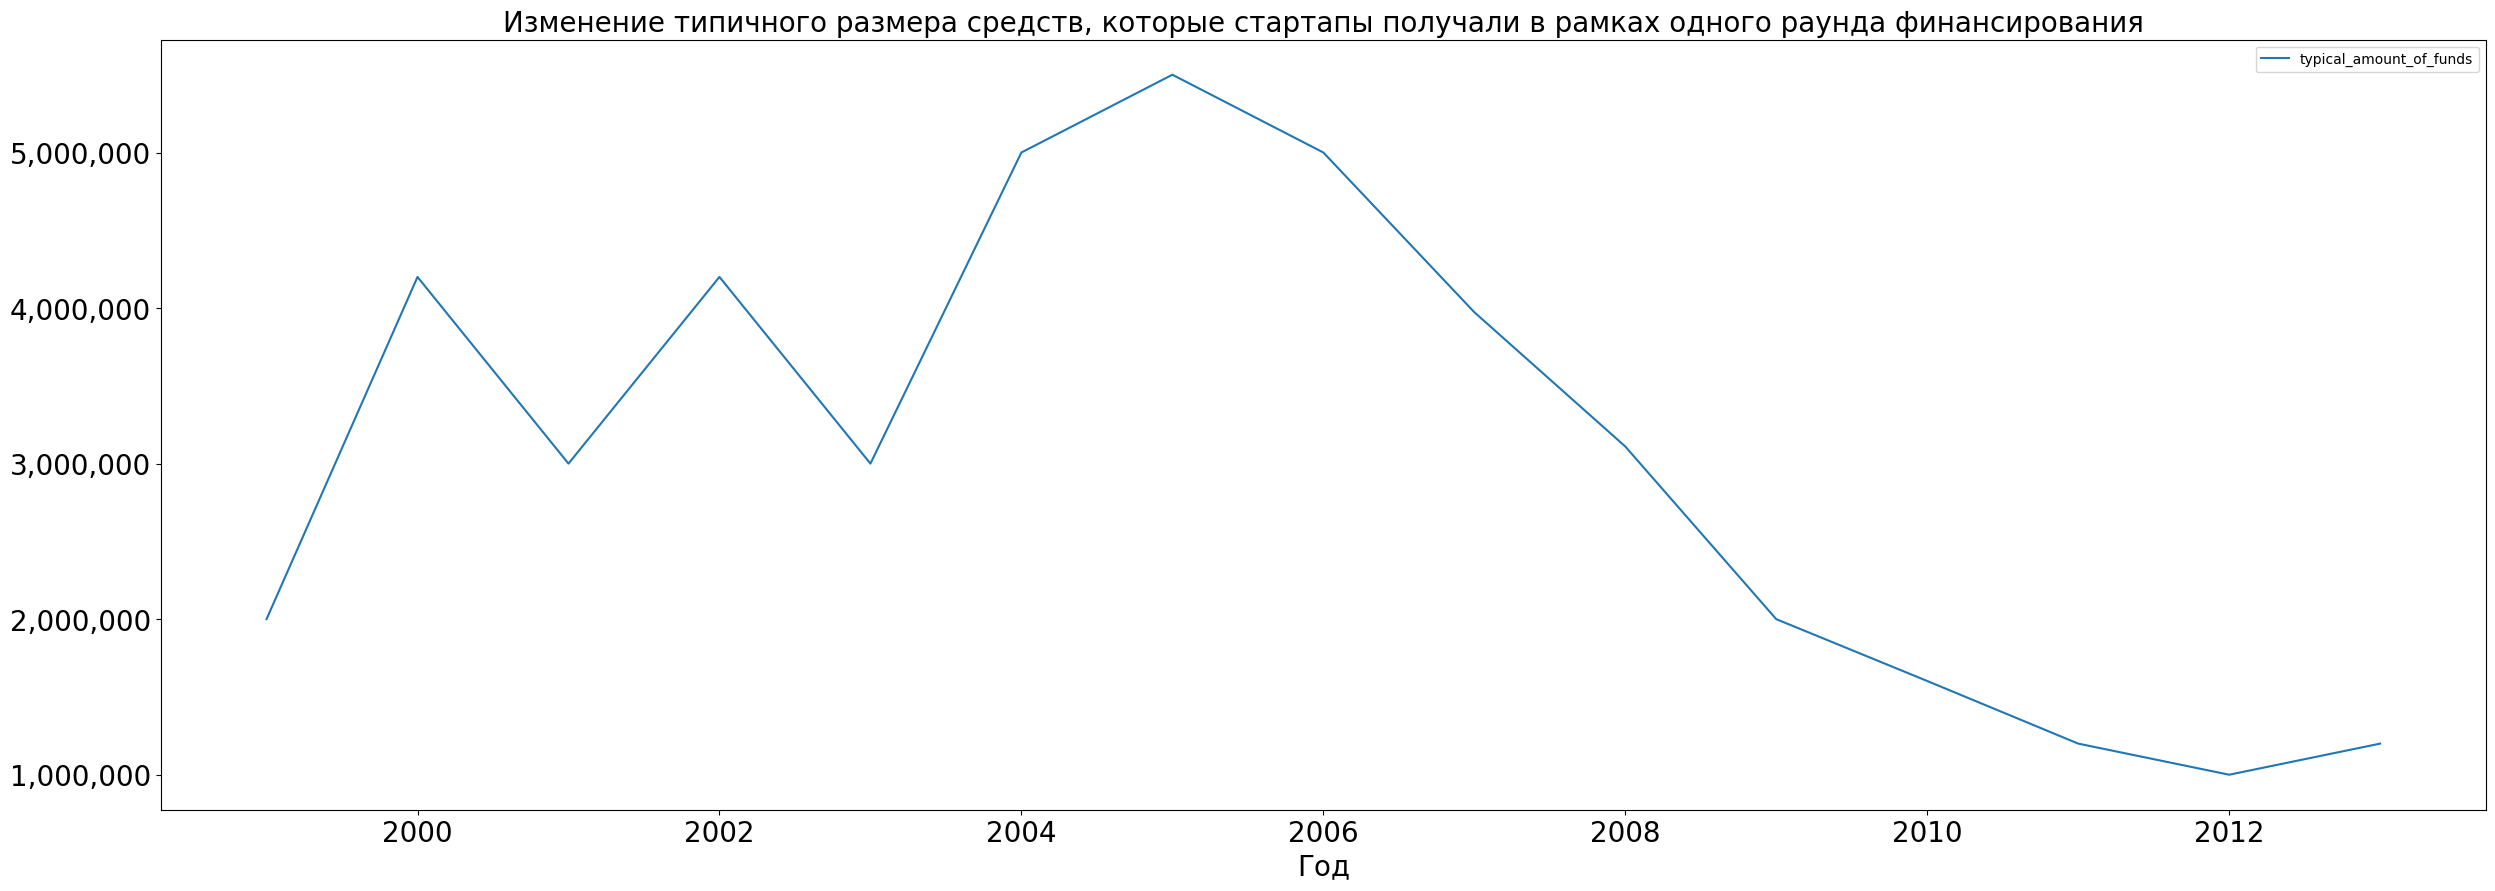

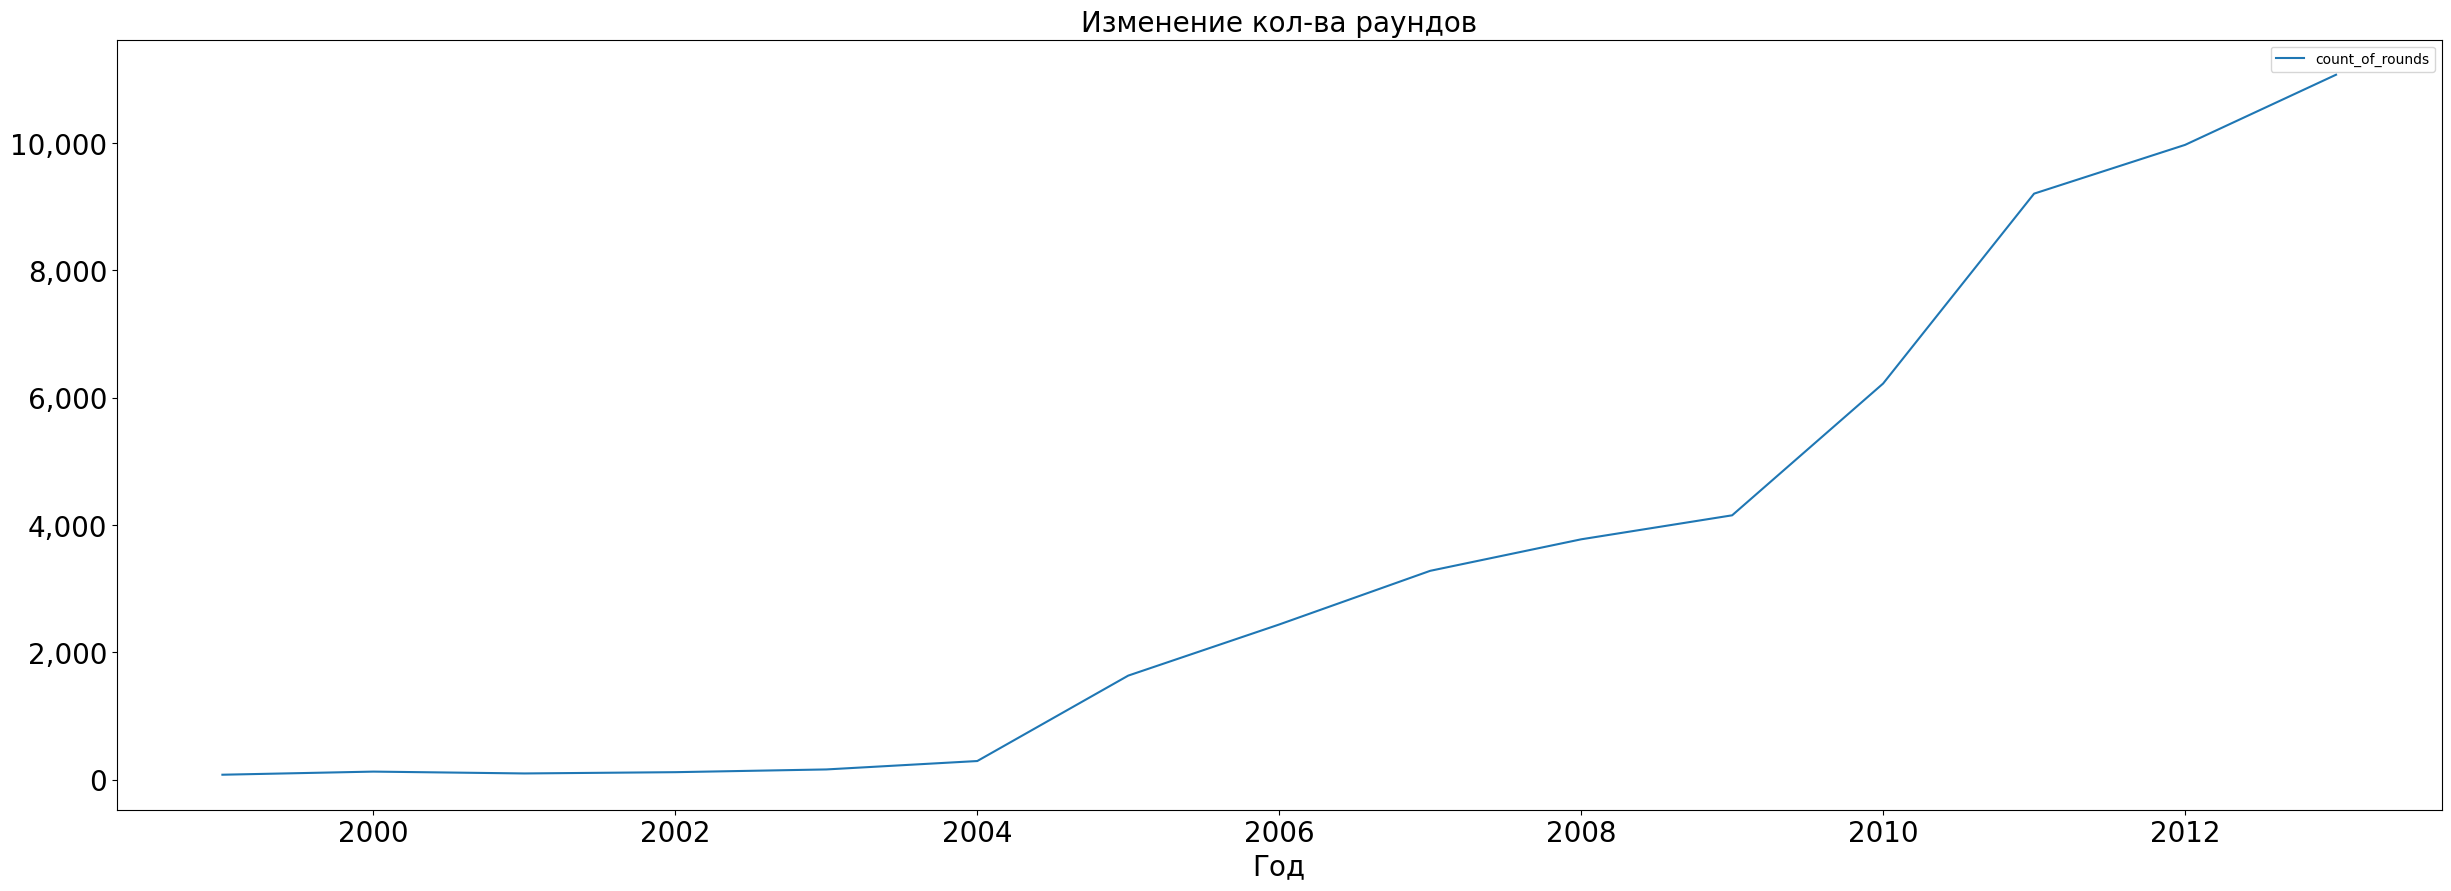

In [15]:
# Строим линейный график типичного размера средств

plt.figure(figsize=(30, 10))

# Получаем текущий объект осей
ax = plt.gca()  

# Избавляемся от научной нотации на оси Y
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

c_a_r_copy_pivot_final.plot(
    kind='line',
    x='year',
    y='typical_amount_of_funds',
    ax=ax,
    fontsize=20
)

plt.title('Изменение типичного размера средств, которые стартапы получали в рамках одного раунда финансирования',
         fontsize=20)
plt.xlabel('Год',fontsize=20)

plt.show()

# Строим линейный график кол-ва раундов

plt.figure(figsize=(30, 10))

# Получаем текущий объект осей
ax = plt.gca()  

# Избавляемся от научной нотации на оси Y
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

c_a_r_copy_pivot_final.plot(
    kind='line',
    x='year',
    y='count_of_rounds',
    ax=ax,
    fontsize=20
)

plt.title('Изменение кол-ва раундов',
         fontsize=20)
plt.xlabel('Год',fontsize=20)

plt.show()

- Максимальный типичный размер собранных средств в рамках одного раунда был в 2005 г.
- В 2013 году видна тенденция на увеличение типичного размера собранных средств в рамках одного раунда

In [16]:
company_and_rounds['funded_year'] = company_and_rounds['funded_at'].dt.year.astype('Int64', errors='ignore')

#Создадим сводную таблицу по годам на основании столбца raised_amount
pivot_company_and_rounds = pd.pivot_table(company_and_rounds, values= 'raised_amount', index='funded_year', aggfunc={'raised_amount': ['median', 'count']}).sort_values(by='funded_year')

#Переименуем столбцы в сводной таблице
pivot_company_and_rounds.columns = ['count_of_rounds', 'typical_amount_of_funds']

#Отфильтруем данные по количеству раундов финансирования
pivot_company_and_rounds = pivot_company_and_rounds[pivot_company_and_rounds['count_of_rounds'] > 50].copy()

#Выведем таблицу на экран
pivot_company_and_rounds

,count_of_rounds,typical_amount_of_funds
funded_year,,
1700,165094,-1.0
1999,76,2000000.0
2000,125,4200000.0
2001,96,3000000.0
2002,116,4200000.0
2003,159,3000000.0
2004,291,5000000.0
2005,1633,5500000.0
2006,2436,5000000.0


Изучим, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оценим, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделим все компании на несколько групп по количеству сотрудников и оценим среднюю долю сотрудников без информации об образовании в каждой из групп.
- Оценим, возможно ли присоединить к этим таблицам ещё и таблицу `degrees.csv`.

Сначала оценим, возможно ли присоединить таблицу `degrees`. Таблица содержит информацию о типе образования, поэтому предположим, что она должна соединиться с таблицей `education`, которая содержит информацию об образовании.

Мы уже знаем, что обе эти таблицы содержат одинаковое кол-во строк - 109610. Это упрощает нам задачу.

Теперь решим, по какому столбцу их можно попробовать присоединить. Есть 2 варианта - идентификатор записи и идентификатор работника. У одного работника может быть несколько записей, поэтому по идентификатору работника присоединить не получится. 

Проверим, соответствуют ли друг другу строки с идентификатором записи в каждой таблице

In [17]:
# Выведем первые и последние 5 строк каждой таблицы
display(education.head())
display(degrees.head())

display(education.tail())
display(degrees.tail())

,id,person_id,instituition,graduated_at
0,1,6117,NaN,1700-01-01
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,1700-01-01


,id,object_id,degree_type,subject
0,1,6117,MBA,NaN
1,2,6136,BA,"English, French"
2,3,6136,MS,Mass Communication
3,4,6005,MS,Internet Technology
4,5,5832,BCS,"Computer Science, Psychology"


,id,person_id,instituition,graduated_at
109605,109606,268589,American Institute of Certtified Public Accoun...,1700-01-01
109606,109607,268527,South China University of Technology,1700-01-01
109607,109608,268527,Clarkson University,1700-01-01
109608,109609,268528,Colorado State University,1700-01-01
109609,109610,268528,University of San Diego School of Law,1700-01-01


,id,object_id,degree_type,subject
109605,109606,268589,CPA,NaN
109606,109607,268527,MS & BS,Engineering
109607,109608,268527,PhD,Engineering
109608,109609,268528,B.S.,Electrical Engineering
109609,109610,268528,J.D.,NaN


Видим, что столбцы **id** соответствуют друг другу. Столбцы **person_id** и **object_id** так же соответствуют друг другу. 
Попробуем объединить эти 2 таблицы в одну

In [18]:
# Объединяем таблицы с помощью inner join
education_degrees = education.merge(degrees, on='id', how='inner').copy()

# Выводим информацию о полученной таблице
display(education_degrees.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int32         
 1   person_id     109610 non-null  int32         
 2   instituition  109555 non-null  object        
 3   graduated_at  109610 non-null  datetime64[ns]
 4   object_id     109610 non-null  int32         
 5   degree_type   98389 non-null   object        
 6   subject       81298 non-null   object        
dtypes: datetime64[ns](1), int32(3), object(3)
memory usage: 4.6+ MB


None

Видим, что кол-во строк сохранилось. Чтобы окончательно убедиться в корректности объединения, проверим, что **person_id** везде равен **object_id**

In [19]:
# Берем срез таблицы, в котором person_id == object_id
display(education_degrees[education_degrees['person_id']== education_degrees['object_id']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int32         
 1   person_id     109610 non-null  int32         
 2   instituition  109555 non-null  object        
 3   graduated_at  109610 non-null  datetime64[ns]
 4   object_id     109610 non-null  int32         
 5   degree_type   98389 non-null   object        
 6   subject       81298 non-null   object        
dtypes: datetime64[ns](1), int32(3), object(3)
memory usage: 4.6+ MB


None

Кол-во строк сохранилось, значит объединение корректное. Далее будем работать с объединенной таблицей `education_degrees`

Следующая задача: оценить, насколько информация об образовании сотрудников полна.

Для начала из таблицы `education_degrees` выделим уникальных сотрудников с информацией об образовании

In [20]:
# Группируем person_id по кол-ву строк
have_ed = education_degrees.groupby('person_id')['id'].count().reset_index().copy()

# Добавляем столбец с маркером 1, означающим, что сотрудник имеет информацию о образовании
have_ed['education'] = 1

Теперь присоединим полученную таблицу к таблице `people`

In [21]:
# Присоединяем с помощью left join
p_e_d = people.merge(have_ed, left_on='id', right_on='person_id', how='left').copy()

# Сразу зададим значение 0 для education там, где автоматически подставился пропуск
p_e_d['education'] = p_e_d['education'].fillna(0)

Сгруппируем датасет по компаниям и посчитаем долю сотрудников без информации об образовании

In [22]:
# Сначала посчитаем долю с информацией об образовании
company = p_e_d.groupby('company_id').agg({
    'id_x' : 'count',
    'education' : 'mean'
}).reset_index().copy()

# Добавим столбец с долей сотрудников без образования и сразу округлим до 2 знаков после запятой
company['no_education'] = round(1 - company['education'],2)

# Уберем из таблицы строку с company_id = -1. Это неидентифицированные компании
company = company[company['company_id'] != -1]

In [23]:
# Посмотрим минимальное и максимальное значение кол-ва сотрудников:
print(min(company['id_x']), 'и', max(company['id_x']))

1 и 244


Видим, что крупных компаний здесь нет, значит нам нужна классификация малых и средних компаний. Воспользуемся стандартной классификацией малых компаний
- До 30 вкл.
- До 50 вкл.
- До 60 вкл.
- До 100 вкл.
- Больше 100 - здесь начинаются средние компании, их не будем разбивать

In [24]:
# Создадим функцию для присваивания значения новому столбцу с категорией компании
def category(value):
    if value <= 30:
        return '1. До 30 вкл.'
    elif value <= 50:
        return '2. До 50 вкл.'
    elif value <= 60:
        return '3. До 60 вкл.'
    elif value <= 100:
        return '4. До 100 вкл.'
    else:
        return '5. Больше 100'
    
# Создадим новый столбец
company['category'] = company['id_x'].apply(category)

In [25]:
# Сгруппируем таблицу по категориям и выведем среднюю долю сотрудников без информации об образовании

company_category = pd.pivot_table(company,
                                 index='category',
                                 values='no_education',
                                 aggfunc=['mean']).reset_index()

# Присваиваем названия столбцам 
company_category.columns = ['category','no_education']

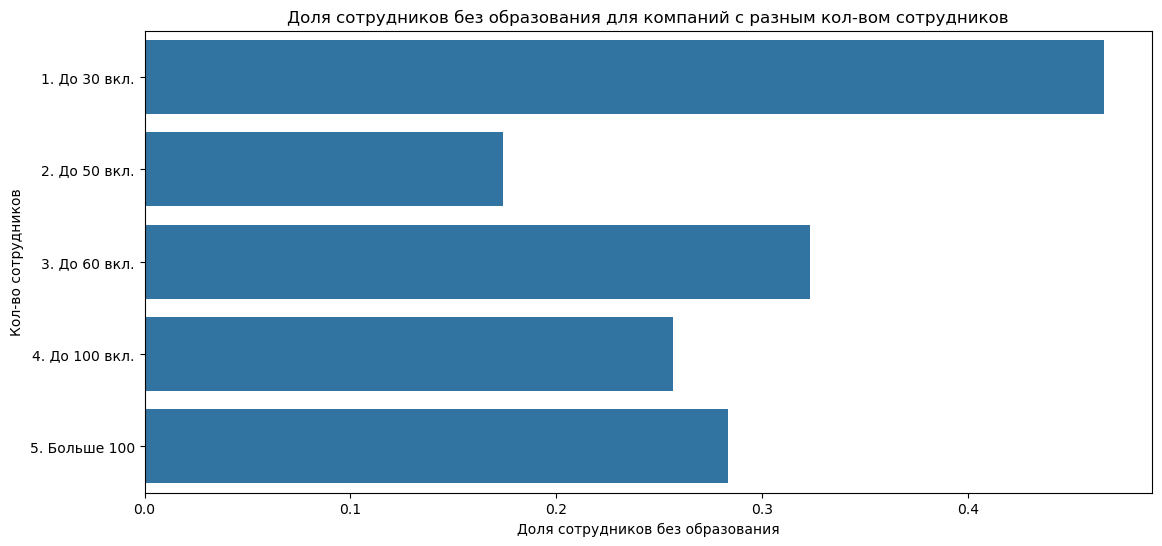

In [26]:
# Изучим как меняется доля сотрудников без информации об образовании в зависимости от компании

plt.figure(figsize=(13,6))

sns.barplot(x='no_education', y='category', data=company_category)

plt.title('Доля сотрудников без образования для компаний с разным кол-вом сотрудников')
plt.xlabel('Доля сотрудников без образования')
plt.ylabel('Кол-во сотрудников')
plt.show()

Видно, что выше всего доля у компаний с кол-вом сотрудников до 30. 
Меньше всего доля у компаний с кол-вом сотрудников от 31 до 50. Далее идет тенденция на рост доли

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Проверим, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да, то насколько часто.
- Оценим, можно ли использовать столбцы с именем `network_username` для объединения данных.

Столбец `network_username` встречается в двух таблицах: `company_and_rounds` и `people`. Проверим, дублируется ли информация в этих столбцах в каждом датасете

In [27]:
print(f'В датасете company_and_rounds всего', end=' ')
print(company_and_rounds.shape[0] - company_and_rounds['network_username'].isna().sum(), end=' ')
print(f'из {company_and_rounds.shape[0]} значений network_username')

company_and_rounds_nunique = company_and_rounds['network_username'].nunique()
print(f'Из них уникальных - {company_and_rounds_nunique}', end='\n\n')

print(f'В датасете people всего', end=' ')
print(people.shape[0] - people['network_username'].isna().sum(), end=' ')
print(f'из {people.shape[0]} значений network_username')

people_nunique = people['network_username'].nunique()
print(f'Из них уникальных - {people_nunique}')

В датасете company_and_rounds всего 95534 из 217774 значений network_username
Из них уникальных - 79571

В датасете people всего 38867 из 226709 значений network_username
Из них уникальных - 38421


Видно, что информация дублируется в обоих случаях, а значит мы не можем использовать эти столбцы для объединения данных

Также проверим пересечение ников

In [28]:
!pip install matplotlib-venn -q
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

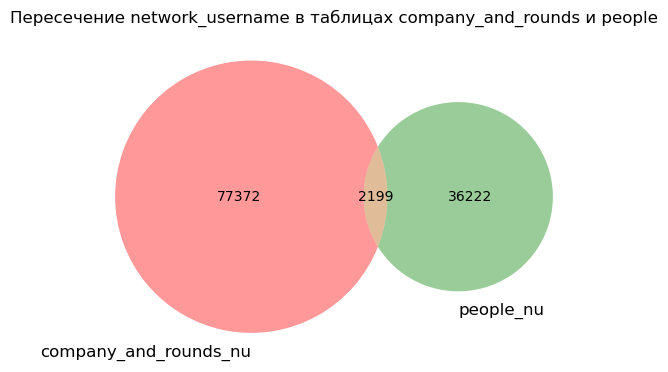

In [29]:
set_1 = set(company_and_rounds['network_username'].dropna())
set_2 = set(people['network_username'].dropna())

venn2([set_1, set_2], set_labels=('company_and_rounds_nu', 'people_nu'))

# Отображаем график
plt.title("Пересечение network_username в таблицах company_and_rounds и people")
plt.show()  

Видно, что при inner мы сохраним только 2199 строк. Следовательно при left или right мы эти же 2199 строк обогатим новыми данными. Считаю, что пользы от объединения не будет вообще. Так как даже эти 2199 пересечений не говорят о том, что в обеих таблицах речь об одной и той же сущности: одинаковые ники в разных таблицах могут быть просто совпадением

Видно, что в `company_and_rounds.csv` много пропусков как раз в информации о раундах, которая нам важна.

В датасете присутствуют два идентичных столбца с `company_id`. Можно сделать вывод, что фактически "склеены" две таблицы - данные по компаниям, данные по раундам финансирования.

Разделим нашу таблицу на две, которые и были изначально.

In [30]:
#Делаем отдельную таблицу по компаниям
df_company = company_and_rounds[['company_id', 'name', 'category_code', 'status', 
                             'founded_at', 'closed_at', 'domain', 
                             'network_username', 'country_code', 
                             'investment_rounds', 'funding_rounds', 
                            'funding_total', 'milestones']]

#Убираем дубли записей
df_company = df_company.drop_duplicates(keep='first')

#Делаем отдельную таблицу по раундам инвестирования
df_rounds = company_and_rounds[['company_id_2', 'raised_amount', 'funding_round_id', 
                            'funded_at', 'funding_round_type', 'pre_money_valuation', 
                            'participants', 'is_first_round', 
                            'is_last_round', 'funded_year']]

#убираем пропуски по колонке
df_rounds=df_rounds.dropna(subset=['funding_round_type'])

# 3. Исследовательский анализ данных

Изучим компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмем данные из обработанного датасета `company_and_rounds.csv` — выберем только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`.

In [31]:
# Отфильтруем таблицу df_company
df_company_final = df_company[((df_company['funding_rounds'] > 0) | (df_company['investment_rounds'] > 0)) 
                            | (df_company['investment_rounds'] == 'acquired')]

# Изучим новую таблицу 
display(df_company_final.info())

display(df_company_final.head(10))

<class 'pandas.core.frame.DataFrame'>
Index: 34031 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id         34031 non-null  int32         
 1   name               34031 non-null  object        
 2   category_code      31327 non-null  object        
 3   status             34031 non-null  object        
 4   founded_at         34031 non-null  datetime64[ns]
 5   closed_at          34031 non-null  datetime64[ns]
 6   domain             31240 non-null  object        
 7   network_username   19651 non-null  object        
 8   country_code       30586 non-null  object        
 9   investment_rounds  34031 non-null  int16         
 10  funding_rounds     34031 non-null  int8          
 11  funding_total      34031 non-null  int64         
 12  milestones         34031 non-null  int8          
dtypes: datetime64[ns](2), int16(1), int32(1), int64(1), int8(2), obje

None

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,Wetpaint,web,operating,2005-10-17,1700-01-01,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000,5
15,1001,FriendFeed,web,acquired,2007-10-01,1700-01-01,friendfeed.com,friendfeed,USA,0,1,5000000,3
20,10014,Mobclix,mobile,acquired,2008-03-01,1700-01-01,mobclix.com,mobclix,USA,0,1,0,4
21,10015,Fitbit,health,operating,2007-10-01,1700-01-01,fitbit.com,fitbit,USA,0,5,68069200,0
26,100155,MTPV,cleantech,operating,2003-01-01,1700-01-01,mtpv.com,NaN,USA,0,3,10125300,1
32,10018,Demandbase,analytics,operating,2006-01-01,1700-01-01,demandbase.com,Demandbase,USA,0,3,33000000,3
36,100189,Locatrix Communications,mobile,operating,2003-11-01,1700-01-01,locatrix.com,NaN,AUS,0,1,250000,1
37,10020,Threebrix E-services Pvt Ltd,NaN,operating,1700-01-01,1700-01-01,NaN,NaN,NaN,1,0,0,0
38,10021,Diditz,network_hosting,operating,2008-01-01,1700-01-01,diditz.com,NaN,IND,0,1,0,0
41,10022,Fundable.com,finance,operating,2012-05-22,1700-01-01,fundable.com,Fundable,USA,3,0,0,4


Видим, что получилось 34031 строка. В целом таблица корректна, но в некоторых столбцах данные неполные:
`category_code`, `founded_at` , `closed_at` (в датах мы ранее уже заполняли пропуски), `domain`, `network_username`, `country_code`

Проанализируем выбросы

In [32]:
# Создадим копию датасета без нулевых значений
funding_total = df_company_final[df_company_final['funding_total'] != 0].copy()

# Изучим статистические метрики funding_total и сразу избавимся от научной нотации
funding_total['funding_total'].describe().apply(lambda x: format(x, '.2f'))

count         27874.00
mean       14816520.27
std        67759363.12
min             291.00
25%          500000.00
50%         2564500.00
75%        11000000.00
max      5700000000.00
Name: funding_total, dtype: object

Видим, что медиана 2 564 500 сильно меньше среднего значения 14 816 520. Что говорит о выбросах справа. Например здесь мы видим очень высокое максимальное значение 5 700 000 000

Далее изучим распределение

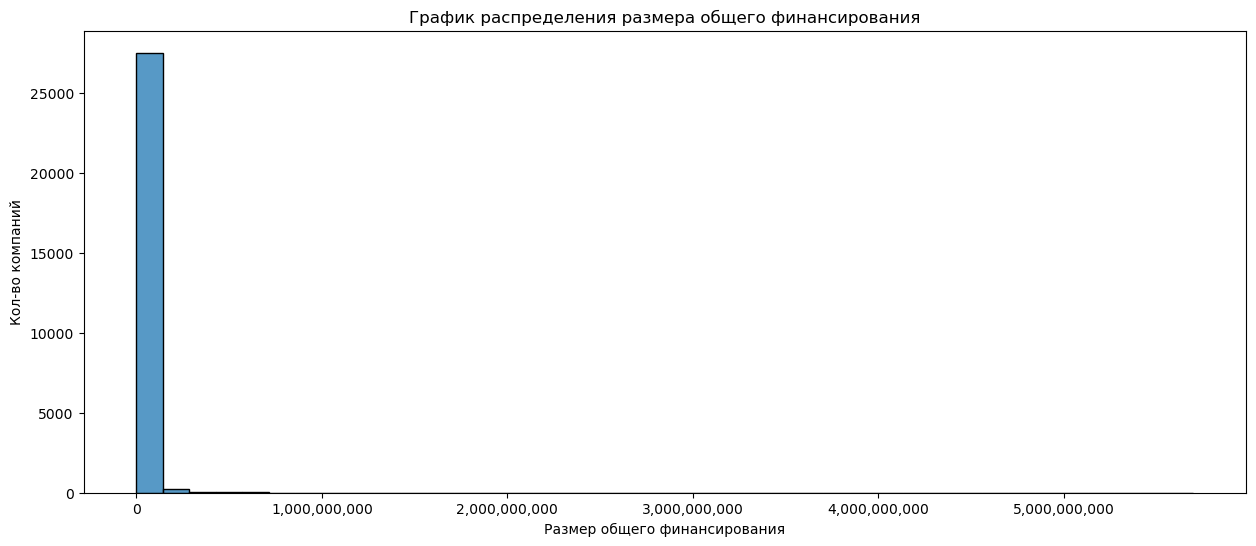

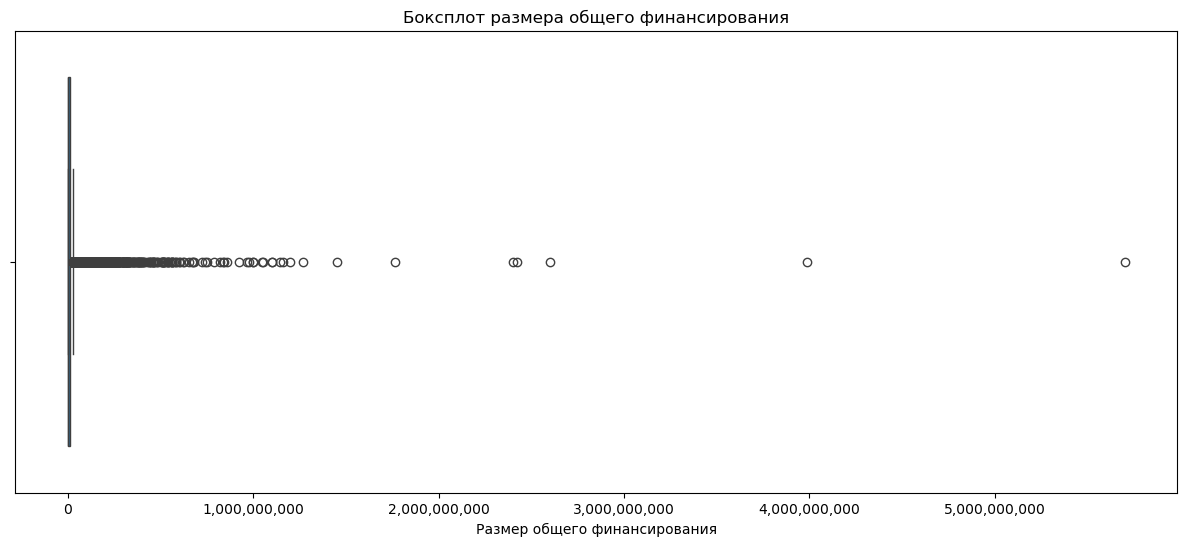

In [33]:
# Построим гистограмму распределения и ящик с усами для funding_total

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 6))

# Получаем текущий объект осей
ax = plt.gca()  

# Избавляемся от научной нотации на оси X
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# Построем гистограмму
sns.histplot(data=funding_total, bins=40, x='funding_total', ax=ax)

# Настройка подписей на оси X
plt.title('График распределения размера общего финансирования')
plt.xlabel('Размер общего финансирования')
plt.ylabel('Кол-во компаний')

plt.show()

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 6))

# Получаем текущий объект осей
ax = plt.gca()  

# Избавляемся от научной нотации на оси X
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

sns.boxplot(data=funding_total, x='funding_total')

plt.title('Боксплот размера общего финансирования')
plt.xlabel('Размер общего финансирования')

plt.show()

Действительно, видим несколько сильных выбросов справа примерно после 500 000 000. Избавимся от них и повторно изучим распределение

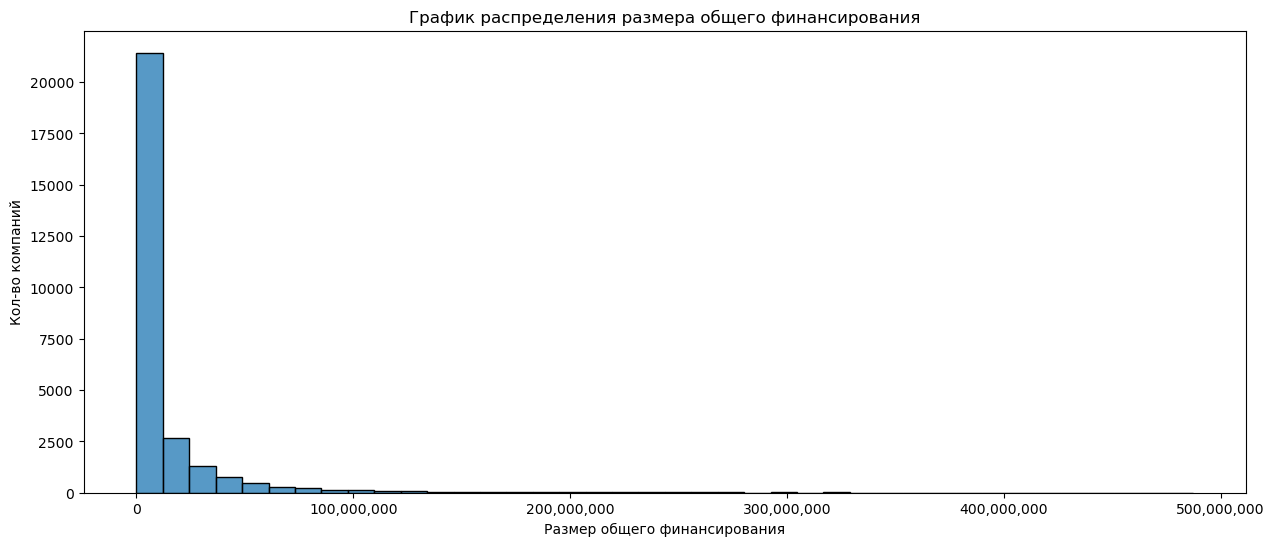

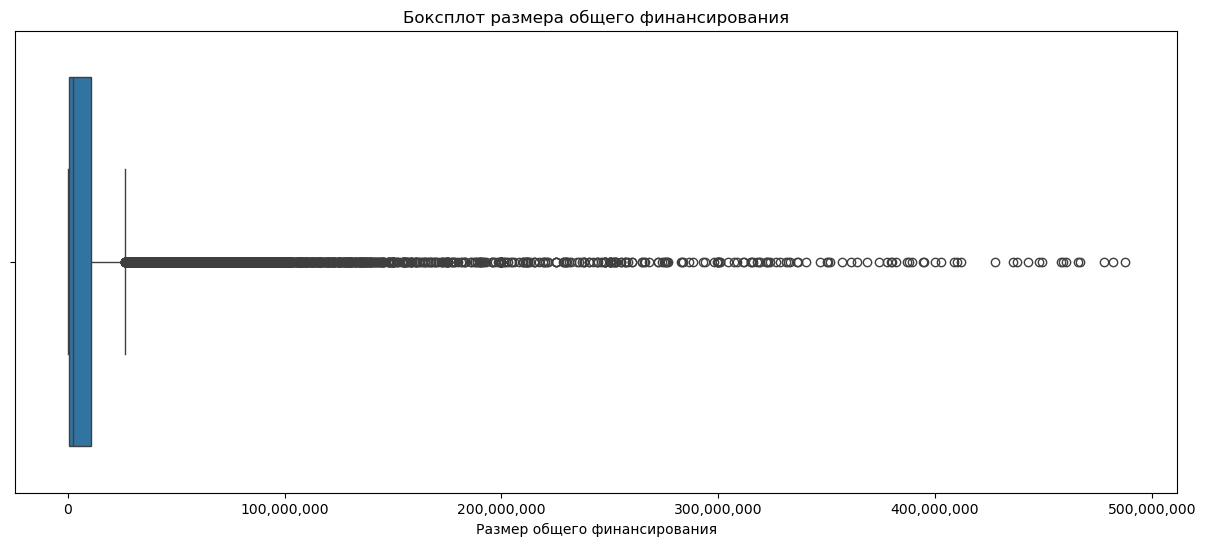

In [34]:
# Создадим копию датасета без выбросов
funding_total_2 = funding_total[funding_total['funding_total'] < 500000000].copy()

# Построим гистограмму распределения и ящик с усами для funding_total

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 6))

# Получаем текущий объект осей
ax = plt.gca()  

# Избавляемся от научной нотации на оси X
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# Построем гистограмму
sns.histplot(data=funding_total_2, bins=40, x='funding_total', ax=ax)

# Настройка подписей на оси X
plt.title('График распределения размера общего финансирования')
plt.xlabel('Размер общего финансирования')
plt.ylabel('Кол-во компаний')

plt.show()

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 6))

# Получаем текущий объект осей
ax = plt.gca()  

# Избавляемся от научной нотации на оси X
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

sns.boxplot(data=funding_total_2, x='funding_total')

plt.title('Боксплот размера общего финансирования')
plt.xlabel('Размер общего финансирования')

plt.show()

In [35]:
funding_total_2['funding_total'].describe().apply(lambda x: format(x, '.2f'))

count        27817.00
mean      12793154.51
std       31675598.90
min            291.00
25%         500000.00
50%        2536000.00
75%       10902500.00
max      487358000.00
Name: funding_total, dtype: object

Медиана 2 536 000 все еще сильно меньше среднего значения 12 793 154. Это ожидаемо, так как большее кол-во значений находится в самом начале гистограммы. 

Будем считать, что типичное значение - 2 536 000, а все, что выше 500 000 000 - это выброс. Однако думаю, что это некорректная оценка, и размер инвестиций зависит от масштаба компании. Следует изучать типичные значения для разных категорий компаний по их величине

Исследуем компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

В таблице `acquisition` оставим только сделки с суммой 0 или 1. И присоединим к ней информацию из df_company_final

In [36]:
# Создаем новую таблицу со сделками за 0 или 1 доллар
acquisition_0_1 = acquisition[acquisition['price_amount'] <= 1].copy()

# Присоединим к этой таблице информацию из df_company_final

acquisition_0_1 = acquisition_0_1.merge(df_company_final, 
                                        left_on='acquired_company_id', 
                                        right_on='company_id', 
                                        how='left').copy()

# Оставим компании с ненулевым общим объемом финансирования
acquisition_0_1 = acquisition_0_1[acquisition_0_1['funding_total'] > 0].copy()

Построим график распределения

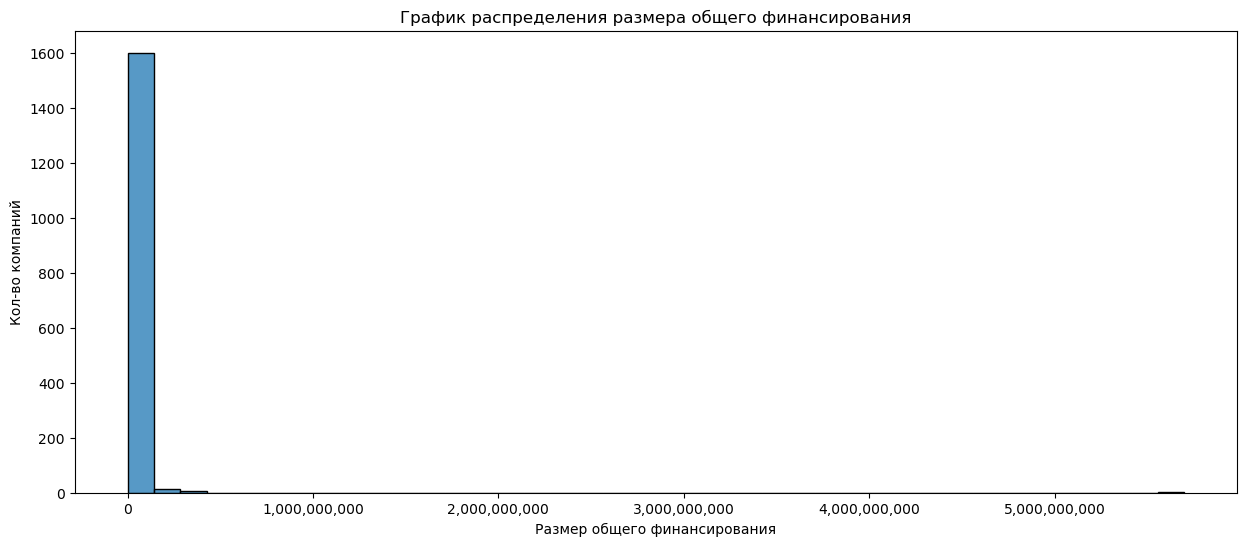

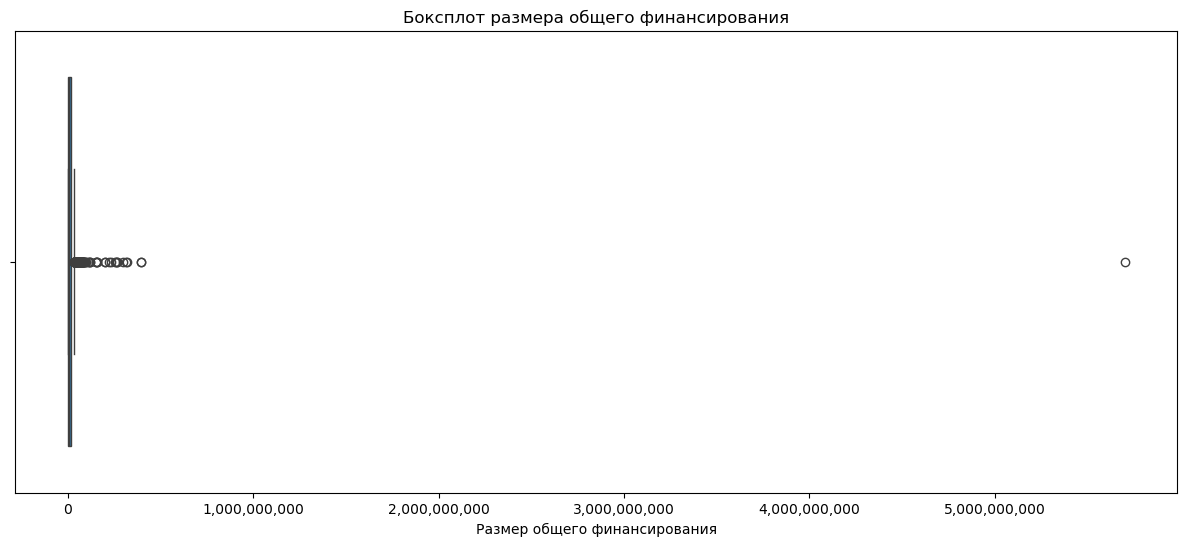

In [37]:
# Построим гистограмму распределения и ящик с усами для acquisition_0_1

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 6))

# Получаем текущий объект осей
ax = plt.gca()  

# Избавляемся от научной нотации на оси X
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# Построем гистограмму
sns.histplot(data=acquisition_0_1, bins=40, x='funding_total', ax=ax)

# Настройка подписей на оси X
plt.title('График распределения размера общего финансирования')
plt.xlabel('Размер общего финансирования')
plt.ylabel('Кол-во компаний')

plt.show()

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 6))

# Получаем текущий объект осей
ax = plt.gca()  

# Избавляемся от научной нотации на оси X
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

sns.boxplot(data=acquisition_0_1, x='funding_total')

plt.title('Боксплот размера общего финансирования')
plt.xlabel('Размер общего финансирования')

plt.show()

Видны выбросы справа примерно со 50 000 000. Избавимся от них

In [38]:
#Сначала узнаем процентиль этого значения
pct = acquisition_0_1['funding_total'].rank(pct=True).loc[acquisition_0_1['funding_total'] == 50000000]
print(pct)

1737    0.946848
4224    0.946848
5219    0.946848
Name: funding_total, dtype: float64


Процентиль - 0.95

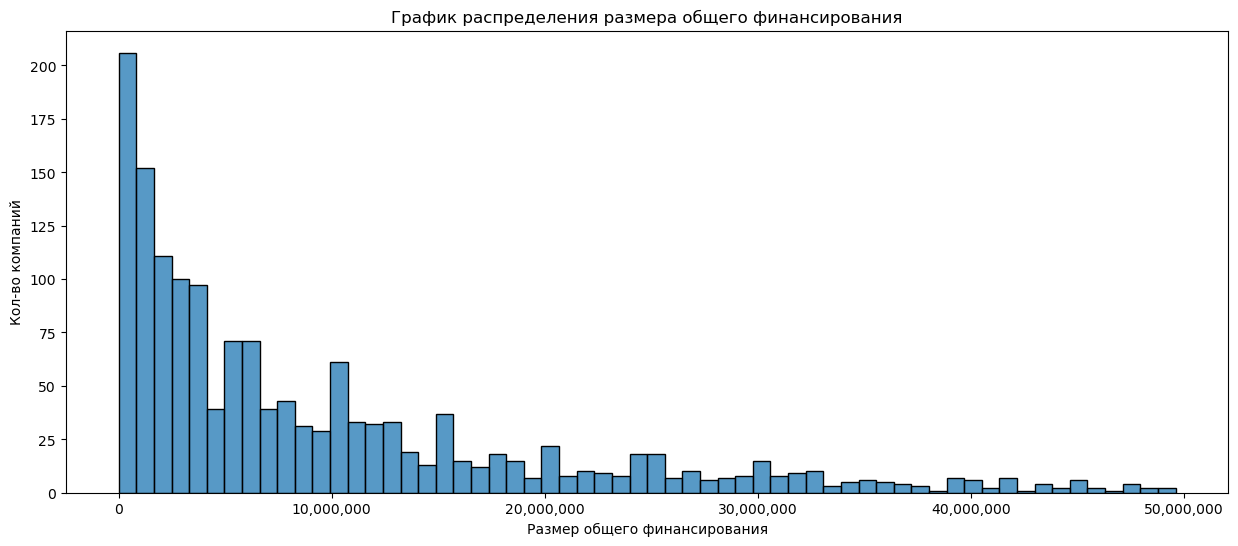

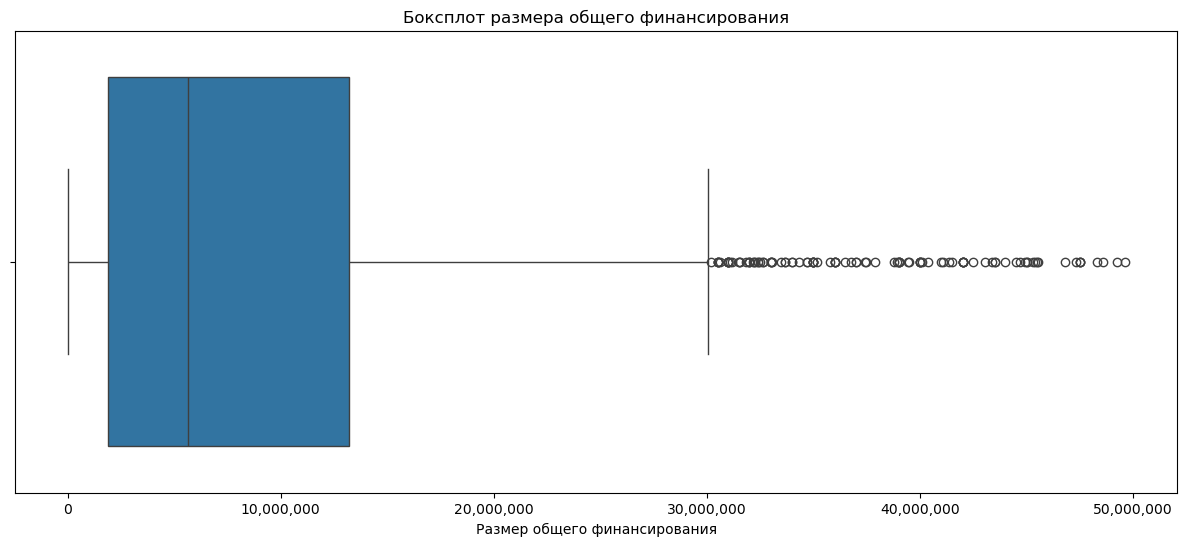

In [39]:
# Создадим копию датафрейма без выбросов справа
acquisition_0_1_copy1 = acquisition_0_1[acquisition_0_1['funding_total'] < 50000000]

# Построим гистограмму распределения и ящик с усами для acquisition_0_1

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 6))

# Получаем текущий объект осей
ax = plt.gca()  

# Избавляемся от научной нотации на оси X
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# Построем гистограмму
sns.histplot(data=acquisition_0_1_copy1, bins=60, x='funding_total', ax=ax)

# Настройка подписей на оси X
plt.title('График распределения размера общего финансирования')
plt.xlabel('Размер общего финансирования')
plt.ylabel('Кол-во компаний')

plt.show()

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 6))

# Получаем текущий объект осей
ax = plt.gca()  

# Избавляемся от научной нотации на оси X
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

sns.boxplot(data=acquisition_0_1_copy1, x='funding_total')

plt.title('Боксплот размера общего финансирования')
plt.xlabel('Размер общего финансирования')

plt.show()

Видим, что график скошен вправо, что ожидаемо, так как сумма финансирования может увеличиваться наверх сколько угодно. 

Слева выбросов нет.

Верхняя граница выбросов - 50 000 000. Соответствует процентилю 0.95

Среди категорий стартапов выделим категории стартапов, которые характеризуются:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Сначала изучим выбросы в price_amount

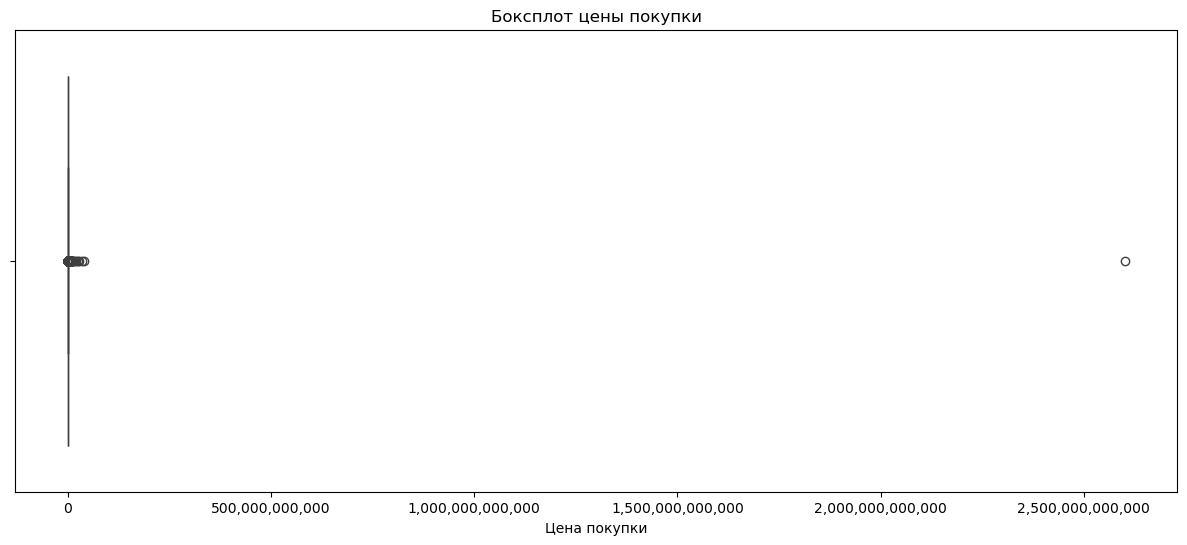

In [40]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 6))

# Получаем текущий объект осей
ax = plt.gca()  

# Избавляемся от научной нотации на оси X
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

sns.boxplot(data=acquisition, x='price_amount')

plt.title('Боксплот цены покупки')
plt.xlabel('Цена покупки')

plt.show()

Видим выброс примерно в 2 500 000 000 000. Удалим его из таблицы

In [41]:
acquisition_correct = acquisition[acquisition['price_amount'] < 2500000000000].copy()

Создадим новуй таблицу, присоединив к `acquisition` таблицу `df_company_final`, чтобы потом сгруппировать информацию по категории стартапа

In [42]:
# Объединяем таблицы
acquisition_company = acquisition_correct.merge(df_company_final, 
                                        left_on='acquired_company_id', 
                                        right_on='company_id', 
                                        how='left').copy()

# Избавляемся от 0 в значении price_amount
acquisition_company = acquisition_company[acquisition_company['price_amount'] != 0].copy()

# Сгруппируем по категориям и добавим агрегацию по медиане, минимальному и максимальному значению
category_startap = acquisition_company.groupby('category_code')['price_amount'].agg(['count','median','min','max']).reset_index().copy()

# Уберем категории с кол-вом стартапом меньше 10, чтобы данные были релевантны
category_startap = category_startap[category_startap['count'] >= 10]

# Добавим размах
category_startap['scope'] = category_startap['max'] - category_startap['min']

Построим график топ 5 категорий с типично высокими ценами, и наибольшим разбросом цен на стартам. Всего в таблице 16 категорий, поэтому кажется оптимальным выбор топ 5 (примерно 30%)

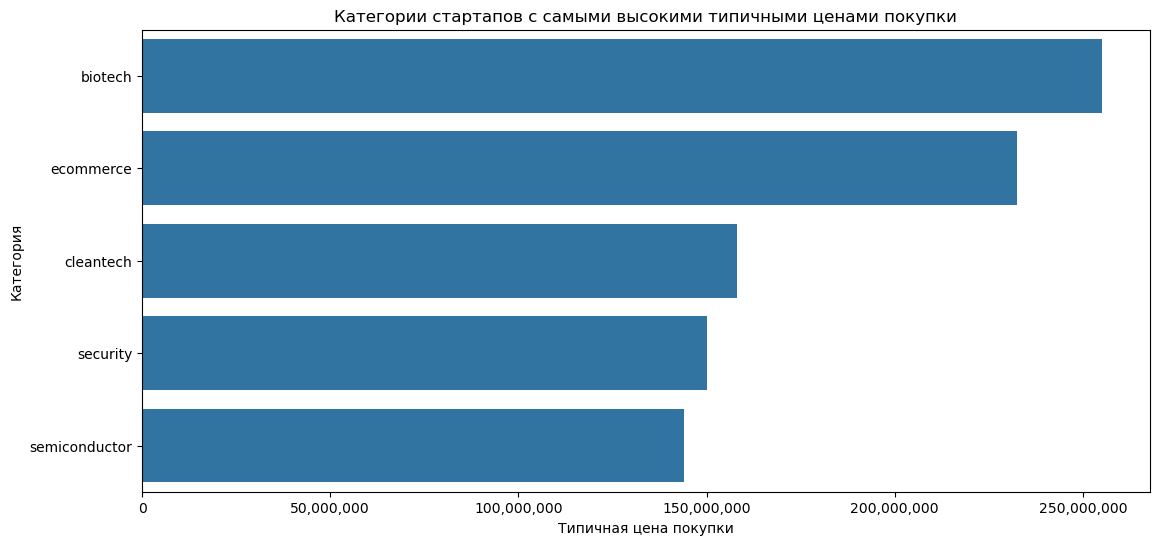

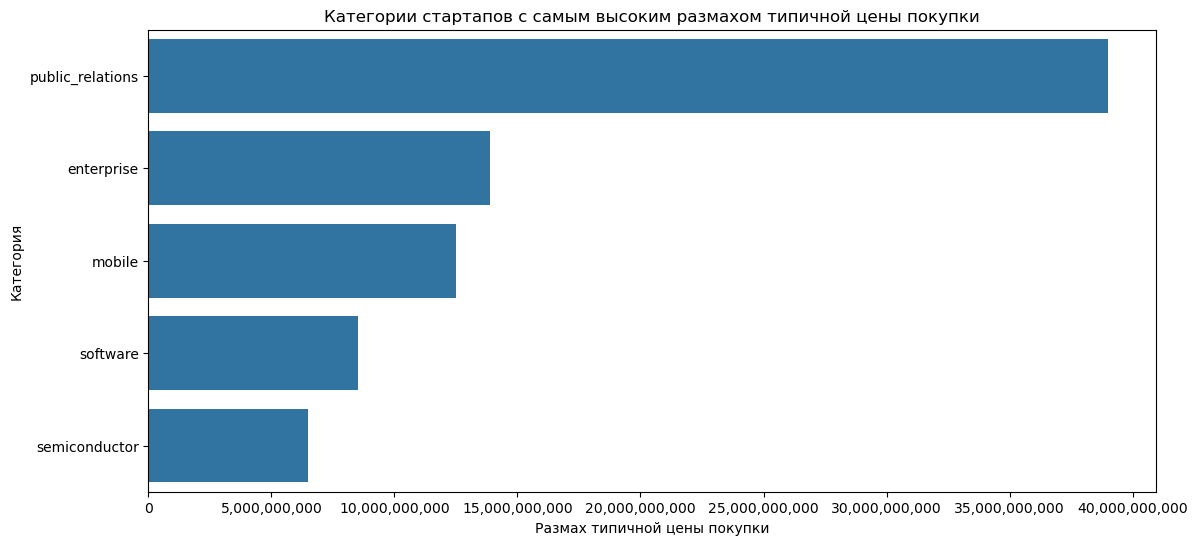

In [43]:
# Сортируем по типичным ценам
category_startap_median = category_startap.sort_values(by='median', ascending=False).head().copy()

plt.figure(figsize=(13,6))

# Получаем текущий объект осей
ax = plt.gca()  

# Избавляемся от научной нотации на оси X
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

sns.barplot(x='median', y='category_code', data=category_startap_median, ax=ax)

plt.title('Категории стартапов с самыми высокими типичными ценами покупки')
plt.xlabel('Типичная цена покупки')
plt.ylabel('Категория')
plt.show()

# Сортируем по размаху
category_startap_scope = category_startap.sort_values(by='scope', ascending=False).head().copy()

plt.figure(figsize=(13,6))

# Получаем текущий объект осей
ax = plt.gca()  

# Избавляемся от научной нотации на оси X
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

sns.barplot(x='scope', y='category_code', data=category_startap_scope, ax=ax)

plt.title('Категории стартапов с самым высоким размахом типичной цены покупки')
plt.xlabel('Размах типичной цены покупки')
plt.ylabel('Категория')
plt.show()

Видим, что самые привлекательные стартапы по типичности цен - это биотех, еком, клинтех, охрана, полупроводники. Причем полупроводники дополнительно находятся в топе по размаху типичности цен

Проанализируем столбец `funding_rounds`. Исследуем типичное значение количества раундов для каждого возможного статуса стартапа.

In [44]:
# Изучим уникальные значения funding_rounds и status
print(df_company_final['funding_rounds'].unique())
print(df_company_final['status'].unique())

[ 3  1  5  0  2  7  4  6  8 10  9 13 11 15 14 12]
['operating' 'acquired' 'closed' 'ipo']


Всего 4 возможных статуса, кол-во раундов варьируется от 0 до 15. Избавимся от компаний с 0 раундами

In [45]:
# Сгруппируем таблицу по статусам, избавившись от компаний с 0 раундами
status_round = df_company_final[df_company_final['funding_rounds'] > 0].groupby('status')['funding_rounds'].agg(['mean',
                                                                        'median']).reset_index().copy()

In [46]:
display(status_round)

,status,mean,median
0,acquired,1.896645,1.0
1,closed,1.383437,1.0
2,ipo,2.526531,2.0
3,operating,1.642359,1.0


Видим, что медианное значение почти везде 1, так как чаще всего всегда был 1 раунд финансирования. Поэтому график построим по среднему, чтобы увидеть разницу

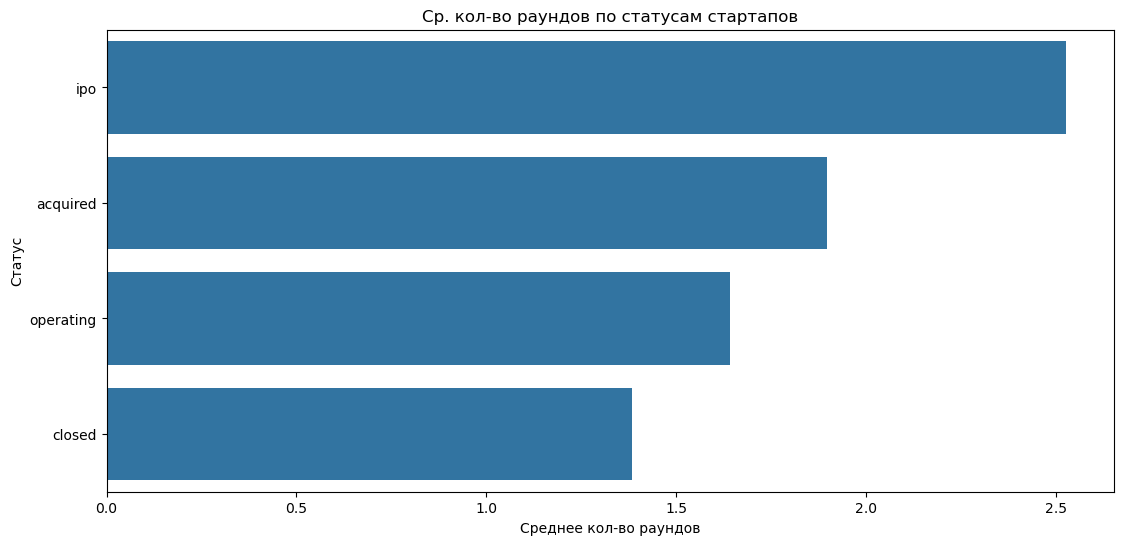

In [47]:
# Сортируем по среднему кол-ву раундов
status_round = status_round.sort_values(by='mean', ascending=False).head().copy()

plt.figure(figsize=(13,6))

sns.barplot(x='mean', y='status', data=status_round)

plt.title('Ср. кол-во раундов по статусам стартапов')
plt.xlabel('Среднее кол-во раундов')
plt.ylabel('Статус')
plt.show()

Видим, что наибольшее кол-во раундов проходило для стартапов в статусе `ipo`, тогда как наименьшее для статуса `closed`. Средне кол-во раундов везде находится примерно между 1.4 и 2.5

# 4. Итоговый вывод и рекомендации

В рамках проекта были изучены датасеты с историческими данными об инвестировании стартапов:
- Изучили, из каких данных состоят датасеты и как их правильно читать
- Соптимизировали данные
- Избавились от пропусков
- Разъединили company_and_rounds на датасет о компаниях и датасет о раундах финансирования
- Изучили выбросы 
- Определили типичные и выбивающиеся значения сумм финансирования для компаний

По результатам ИАД можно сделать следующие выводы: 
- Доля людей без информации об образовании выше всего у компаний с кол-вом сотрудников до 30. Однако далее нельзя утверждать, что доля сокращается с ростом кол-ва сотрудников, наоборот даже растет, начиная с компаниями с кол-вом сотрудников от 31 до 50
- У значения суммы финансирования компаний очень высокий размах, поэтому для корректной оценки размера инвестиций следует изучать типичные значения для разных категорий компаний по их величине
- Самые привлекательные стартапы по типичности цен - это биотех, еком, клинтех, охрана, полупроводники. Причем полупроводники дополнительно находятся в топе по размаху типичности цен, что говорит об их готовности идти на риски. 

Рекомендации:
- Рекомендую присмотреться к направлениям биотех, еком, клинтех, охрана, полупроводники, как к самым привлекательным по типичности цен
- При работе с компаниями, находящимися в статусе ipo рекомендую готовиться к повышенному кол-ву раундов финансирования
- Рекомендую провести дополнительный анализ типичных размеров инвестиций в разрезе компаний по их "крупности"